In [44]:
# project work flow
#1. choose a data set (i choose kidney prediction classification data)
#2 . import all the necessary libraries 
# 3. load the data set using pandas module 
# 4.feature selection (X,y) and scaling data(standard scalar),split the data
#5.model creation by invoking alogorithm
#6.model training by fitting (X train & y train) data 
#7. model prediction (ypre)- 'using xtest '
#8. calculate perfomace accuracy using output metrics


In [ ]:
# pblm : category -  medical data base,  kidney stone prediction  using logistic regression , random forest and decision tree 
# kidney stone prediction data set consists of  7 columns (	gravity,	ph,	osmo,	cond,	urea,	calc,	target,) 

In [45]:
#2 . import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
# 3. load the data set using pandas module 
data = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\MACHINE LEARNING\kidney_stone.csv")

In [47]:
data[:5]

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [49]:
data.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [50]:
data.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [51]:
data.shape

(79, 7)

In [52]:
# 4.feature selection (X,y) and scaling data(standard scalar),split the data
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values

In [53]:
print(X.shape)
print(y.shape)

(79, 6)
(79,)


In [54]:
X[:5]

array([[  1.021,   4.91 , 725.   ,  14.   , 443.   ,   2.45 ],
       [  1.017,   5.74 , 577.   ,  20.   , 296.   ,   4.49 ],
       [  1.008,   7.2  , 321.   ,  14.9  , 101.   ,   2.36 ],
       [  1.011,   5.51 , 408.   ,  12.6  , 224.   ,   2.15 ],
       [  1.005,   6.52 , 187.   ,   7.5  ,  91.   ,   1.16 ]])

In [55]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:
# data spliting
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
print('training input samples count',xtrain.shape)
print('training output samples count',ytrain.shape)
print('testing input samples count',xtest.shape)
print('testing output samples count',ytest.shape)

training input samples count (63, 6)
training output samples count (63,)
testing input samples count (16, 6)
testing output samples count (16,)


In [58]:
#5.model creation by invoking algorithm
logreg = LogisticRegression()

In [59]:
#6.model training by fitting (X train & y train) data
logreg.fit(xtrain,ytrain)

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
#7. model prediction (ypre)- 'using xtest '
ypre = logreg.predict(xtest)

In [61]:
#8. calculate perfomace accuracy using output metrics
accuracy_score(ytest,ypre)

0.8125

In [62]:
compare = pd.DataFrame({'actual output':ytest, 'predicted output':ypre})

In [63]:
compare

,actual output,predicted output
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,0
9,1,1


# kidney stone prediction using decision tree


In [64]:
dtree = DecisionTreeClassifier(max_depth=3, criterion='gini')


In [65]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [66]:
ypre_dt = dtree.predict(xtest)

In [67]:
accuracy_score(ytest, ypre_dt)

0.6875

In [68]:
compare1 = pd.DataFrame({'actual':ytest, 'logreg':ypre, 'decisiontree': ypre_dt})

In [69]:
compare1

,actual,logreg,decisiontree
0,1,1,1
1,0,0,1
2,0,0,0
3,1,1,0
4,1,1,1
5,1,0,0
6,1,1,1
7,1,1,1
8,1,0,1
9,1,1,1


# 3 kidney stone prediction using random forest

In [70]:
rf = RandomForestClassifier(n_estimators=10, criterion= 'gini')

In [74]:
# feature scaling 
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [75]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10)

In [76]:
ypre_rf = rf.predict(xtest)

In [77]:
accuracy_score(ytest, ypre_rf)

0.875

In [78]:
report = pd.DataFrame({'model':['logreg','desiciontree', 'randomforest'],
                       'accuaracy %':[accuracy_score(ytest,ypre)*100,accuracy_score(ytest,ypre_dt)*100,accuracy_score(ytest,ypre_rf)*100]})

In [79]:
report

,model,accuaracy %
0,logreg,81.25
1,desiciontree,68.75
2,randomforest,87.50


<Axes: ylabel='accuaracy %'>

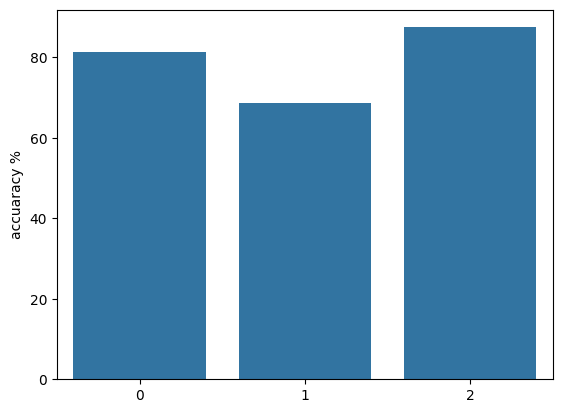

In [82]:
# visualizing the report of all three algorithm
sns.barplot(report['accuaracy %'])

In [ ]:
# conclusion
# Based on the provided accuracies, Random Forest demonstrates the highest performance at 87.50%, followed by Logistic Regression at 81.25%. 
# Decision Tree lags behind with an accuracy of 68.75%. Therefore, for this dataset, Random Forest proves to be the most effective model,
# offering the highest predictive accuracy among the options

Note: you may need to restart the kernel to use updated packages.
